In [57]:
import cv2
import glob
import numpy as np
import matplotlib.pyplot as plt
class_names = ['auto_test', 'test', 'train', 'val']
IMG_SIZE = 112

In [58]:
def get_data(path, class_name):
    data = []
    for i in range(0, 5):
        try:
            files = glob.glob(path+"/"+class_name+"/"+str(i)+"/*")
            for f in files:
                img = cv2.imread(f)
                R, G, B = cv2.split(img)
                new_R = cv2.equalizeHist(R)
                new_G = cv2.equalizeHist(G)
                new_B = cv2.equalizeHist(B)
                img = cv2.merge((new_R, new_G, new_B))
                img =  cv2.resize(img, (IMG_SIZE, IMG_SIZE))
                data.append(np.array([np.array(img) / 255.0, i], dtype=object))
        except:
            pass
    np.random.shuffle(data)
    return data

In [59]:
import numpy as np
train_data = get_data("data", "train")
train_data = np.array(train_data, dtype=object)
train_data.shape

(5778, 2)

#### Testing which clipLimit to use for the dataset

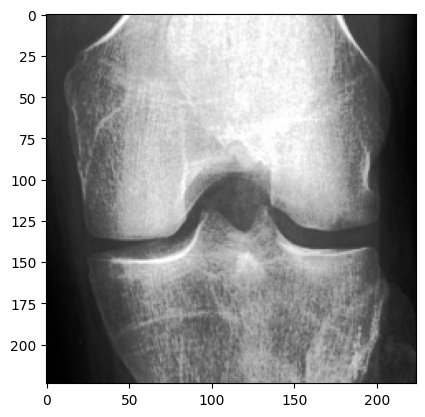

In [60]:
img = cv2.imread("data/auto_test/0/9003316_2.png")
clahe = cv2.createCLAHE(clipLimit=3.0, tileGridSize=(8,8))
R, G, B = cv2.split(img)
output1_R = cv2.equalizeHist(R)
output1_G = cv2.equalizeHist(G)
output1_B = cv2.equalizeHist(B)

img = cv2.merge((output1_R, output1_G, output1_B))
plt.imshow(img)


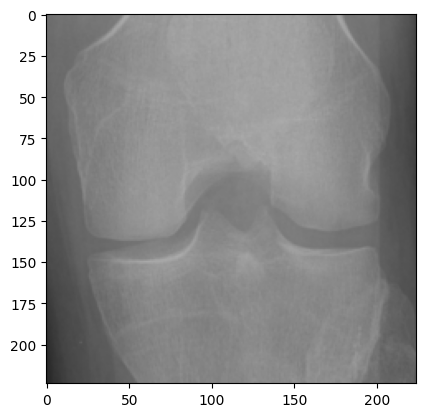

In [61]:
img = cv2.imread("data/auto_test/0/9003316_2.png")
plt.imshow(img)

#### Training dataset

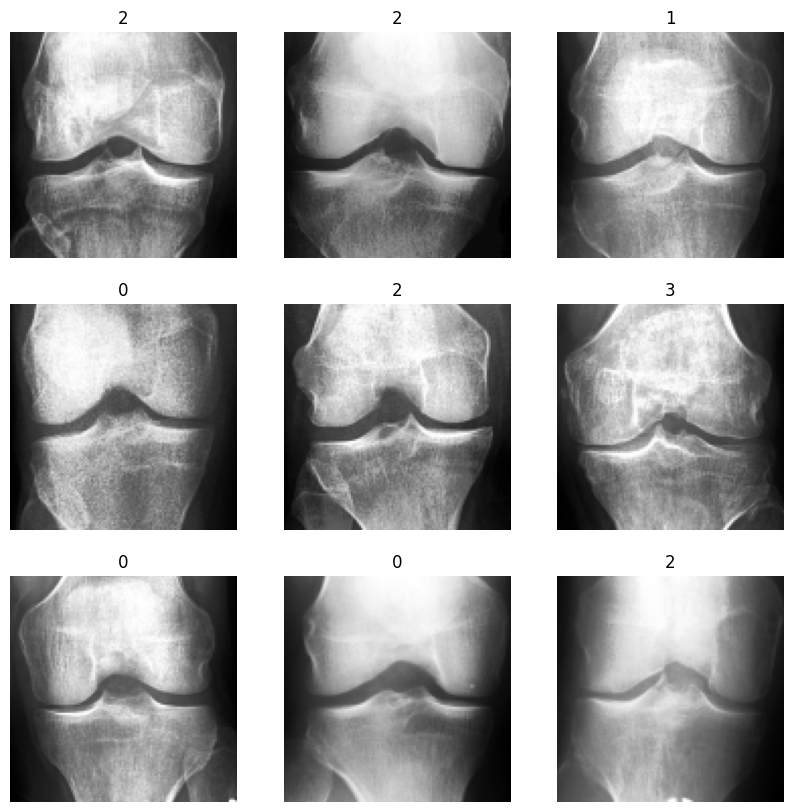

In [62]:
plt.figure(figsize=(10, 10))
for i in range(0, 9):
    ax = plt.subplot(3, 3, i + 1)
    val = np.random.randint(train_data.shape[0])
    plt.imshow(train_data[val][0])
    plt.title(train_data[val][1])
    plt.axis("off")

#### Validation dataset

In [63]:
val_data = get_data("data", "val")
val_data = np.array(val_data, dtype=object)
val_data.shape

(826, 2)

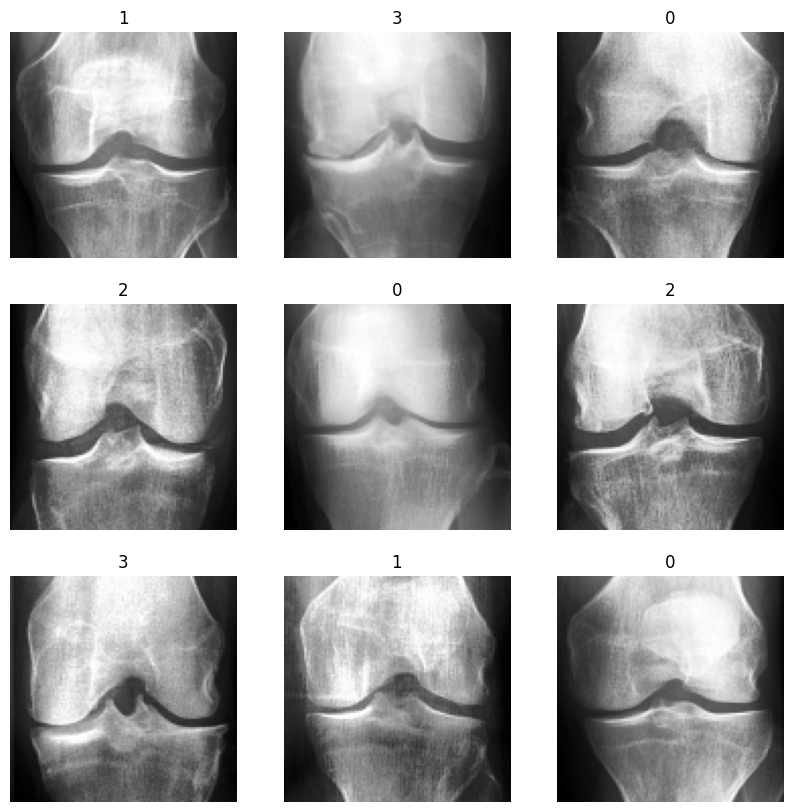

In [64]:
plt.figure(figsize=(10, 10))
for i in range(0, 9):
    ax = plt.subplot(3, 3, i + 1)
    val = np.random.randint(val_data.shape[0])
    plt.imshow(val_data[val][0])
    plt.title(val_data[val][1])
    plt.axis("off")

#### Test Dataset

In [65]:
test_data = get_data("data", "test")
test_data = np.array(test_data, dtype=object)
test_data.shape

(1656, 2)

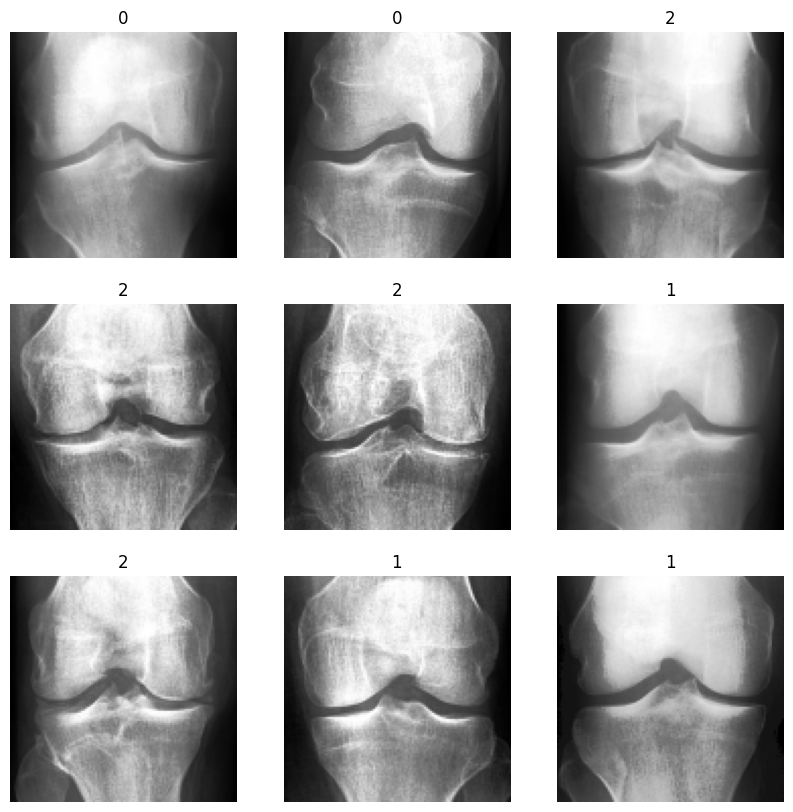

In [66]:
plt.figure(figsize=(10, 10))
for i in range(0, 9):
    ax = plt.subplot(3, 3, i + 1)
    val = np.random.randint(test_data.shape[0])
    plt.imshow(test_data[val][0])
    plt.title(test_data[val][1])
    plt.axis("off")

(5778, 112, 112, 3) (5778, 5)


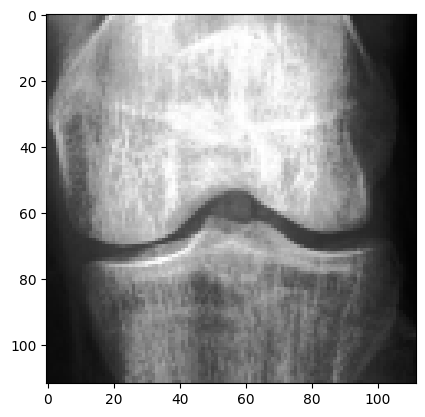

In [67]:
from sklearn.preprocessing import LabelBinarizer
train_x = []
train_y = []
for i in range(train_data.shape[0]):
    train_x.append(train_data[i][0])
    train_y.append(train_data[i][1])
train_x = np.array(train_x, ndmin=4)
lb = LabelBinarizer()
train_y = lb.fit_transform(train_y)
print(train_x.shape, train_y.shape)
plt.imshow(train_x[0])

(826, 112, 112, 3) (826, 5)


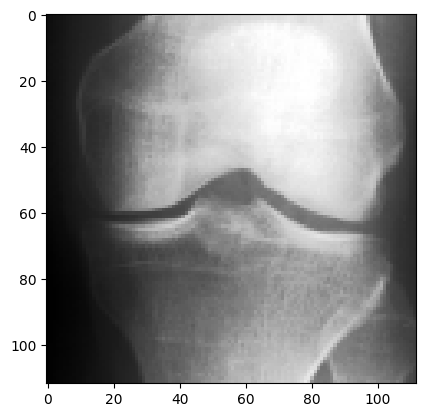

In [69]:
val_x = []
val_y = []
for i in range(val_data.shape[0]):
    val_x.append(val_data[i][0])
    val_y.append(val_data[i][1])
val_x = np.array(val_x, ndmin=4)
lb = LabelBinarizer()
val_y = lb.fit_transform(val_y)
print(val_x.shape, val_y.shape)
plt.imshow(val_x[0])

(1656, 112, 112, 3) (1656, 5)


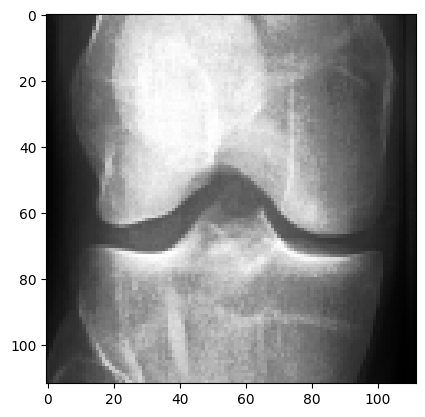

In [70]:
test_x = []
test_y = []
for i in range(test_data.shape[0]):
    test_x.append(test_data[i][0])
    test_y.append(test_data[i][1])
test_x = np.array(test_x, ndmin=4)
lb = LabelBinarizer()
test_y = lb.fit_transform(test_y)
print(test_x.shape, test_y.shape)
plt.imshow(test_x[0])